In [93]:
import pandas as pd
df = pd.read_csv('credit_immobilier_ISF.csv')

In [94]:
df.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
0,< 0 Euro,6,critique,ameublement,1169,inconnu,> 7 annees,4.0,67.0,aucun,proprietaire,2,qualifie,1,oui,non,8135.110140
1,1 - 200 Euro,48,bon,ameublement,5951,< 100 Euro,1 - 4 annees,2.0,22.0,aucun,proprietaire,1,qualifie,1,oui,oui,19334.307686
2,inconnu,12,critique,education,2096,< 100 Euro,4 - 7 annees,3.0,49.0,aucun,proprietaire,1,non_qualifie,2,oui,non,4864.954258
3,< 0 Euro,42,bon,ameublement,7882,< 100 Euro,4 - 7 annees,4.0,45.0,aucun,autre,1,qualifie,2,oui,non,22152.947349
4,< 0 Euro,24,pauvre,auto,4870,< 100 Euro,1 - 4 annees,4.0,53.0,aucun,autre,2,qualifie,2,oui,oui,23900.704144


In [95]:
df.tail()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
1016,inconnu,45,critique,auto,4576,100 - 500 Euro,chomeur,4.0,27.0,aucun,proprietaire,1,qualifie,1,oui,non,17281.972830
1017,1 - 200 Euro,45,critique,auto,4576,100 - 500 Euro,chomeur,4.0,27.0,aucun,proprietaire,1,qualifie,1,oui,non,23544.389153
1018,inconnu,15,critique,auto,5045,inconnu,> 7 annees,4.0,59.0,aucun,proprietaire,1,qualifie,1,oui,non,6247.903416
1019,1 - 200 Euro,15,tres bon,auto,1234,100 - 500 Euro,1 - 4 annees,2.0,25.0,aucun,locataire,1,qualifie,1,oui,oui,3702.608164
1020,1 - 200 Euro,35,bon,auto,1734,100 - 500 Euro,1 - 4 annees,2.0,25.0,aucun,proprietaire,1,qualifie,1,oui,oui,9141.314880


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   object 
 14  telephon

In [97]:
df.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
montant                     0
compte_epargne              1
duree_emploi                0
annees_presence_logement    3
age                         1
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         3
dependants                  0
telephone                   0
defaillant                  1
revenufinal                 0
dtype: int64

In [272]:
# (df == 'inconnu').sum()/len(df)

In [273]:
# df['defaillant'].value_counts()

In [275]:
#df.select_dtypes(exclude=['int64', 'float']).columns

In [274]:
#df.columns

# 0-Prétraitement

### Feature 'telephone'

In [102]:
df['telephone'].value_counts()

oui    1021
Name: telephone, dtype: int64

In [103]:
# Drop 'telephone' car il n'y a qu'une seule valeur
df = df.drop('telephone', axis=1)

### Feature 'dependants'

In [104]:
df['dependants'].value_counts()

1      864
2      156
oui      1
Name: dependants, dtype: int64

In [105]:
df['dependants'][df['dependants']=='oui'] = df['dependants'].mode()[0]
df['dependants'].value_counts()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    865
2    156
Name: dependants, dtype: int64

In [106]:
df['dependants']=df['dependants'].astype('int64')
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   int64  
 14  defailla

In [107]:
#df.select_dtypes(exclude=['int64', 'float']).columns

Index(['compte_courant', 'historique_credit', 'raison', 'compte_epargne',
       'duree_emploi', 'autre_credit', 'logement', 'job', 'defaillant'],
      dtype='object')

In [108]:
#df.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
montant                     0
compte_epargne              1
duree_emploi                0
annees_presence_logement    3
age                         1
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         3
dependants                  0
defaillant                  1
revenufinal                 0
dtype: int64

### Feature 'compte_epargne'

In [124]:
df['compte_epargne'].value_counts()

< 100 Euro         612
inconnu            189
100 - 500 Euro     108
500 - 1000 Euro     64
> 1000 Euro         48
Name: compte_epargne, dtype: int64

In [115]:
df['compte_epargne'] = df['compte_epargne'].fillna(df['compte_epargne'].mode()[0])

### Feature 'annees_presence_logement' 

In [117]:
df['annees_presence_logement'].median()

3.0

In [118]:
df['annees_presence_logement'] = df['annees_presence_logement'].fillna(df['annees_presence_logement'].median()) 

### Feature 'age'

In [119]:
df['age'].median()

33.0

In [120]:
df['age'] = df['age'].fillna(df['age'].median())

### Feature 'job'

In [123]:
df['job'].value_counts()

qualifie        648
non_qualifie    199
management      148
chomeur          22
oui               1
Name: job, dtype: int64

In [125]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['job'][df['job']=='oui'] = df['job'].mode()[0]
df['job'].value_counts()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


qualifie        652
non_qualifie    199
management      148
chomeur          22
Name: job, dtype: int64

### Label 'defaillant'

In [127]:
df['defaillant'] = df['defaillant'].fillna(df['defaillant'].mode()[0])
df['defaillant'].value_counts()

non    718
oui    303
Name: defaillant, dtype: int64

In [128]:
df.select_dtypes(exclude=['int64', 'float']).columns

Index(['compte_courant', 'historique_credit', 'raison', 'compte_epargne',
       'duree_emploi', 'autre_credit', 'logement', 'job', 'defaillant'],
      dtype='object')

### données final

In [138]:
df_final = df.copy()

In [139]:
categorial = ['compte_courant', 'historique_credit', 'raison', 'compte_epargne',
       'duree_emploi', 'autre_credit', 'logement', 'job', 'defaillant']
df_final = pd.get_dummies(df_final, columns=categorial, drop_first=True)
df_final.head()

,duree_emprunt_mois,montant,annees_presence_logement,age,nbre_emprunts_actuels,dependants,revenufinal,compte_courant_< 0 Euro,compte_courant_> 200 Euro,compte_courant_inconnu,...,autre_credit_aucun,autre_credit_banque,autre_credit_magasin,logement_locataire,logement_proprietaire,logement_qualifie,job_management,job_non_qualifie,job_qualifie,defaillant_oui
0,6,1169,4.0,67.0,2,1,8135.110140,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,48,5951,2.0,22.0,1,1,19334.307686,0,0,0,...,1,0,0,0,1,0,0,0,1,1
2,12,2096,3.0,49.0,1,2,4864.954258,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,42,7882,4.0,45.0,1,2,22152.947349,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,24,4870,4.0,53.0,2,2,23900.704144,1,0,0,...,1,0,0,0,0,0,0,0,1,1


In [276]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duree_emprunt_mois              1021 non-null   int64  
 1   montant                         1021 non-null   int64  
 2   annees_presence_logement        1021 non-null   float64
 3   age                             1021 non-null   float64
 4   nbre_emprunts_actuels           1021 non-null   int64  
 5   dependants                      1021 non-null   int64  
 6   revenufinal                     1021 non-null   float64
 7   compte_courant_< 0 Euro         1021 non-null   uint8  
 8   compte_courant_> 200 Euro       1021 non-null   uint8  
 9   compte_courant_inconnu          1021 non-null   uint8  
 10  historique_credit_critique      1021 non-null   uint8  
 11  historique_credit_parfait       1021 non-null   uint8  
 12  historique_credit_pauvre        10

### Diviser le jeu de données et la mise à l'échelle

In [144]:
from sklearn.model_selection import train_test_split

# Suppression du label Fidelite dans X et transformation en array avec values
X = df_final.drop(['defaillant_oui'],axis=1).values

# Label Fidelite dans y 
y = df_final['defaillant_oui'].values

In [145]:
# Split it train set et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [146]:
# Normalisation des data indispensable avec les réseaux de neurones
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# fit transform sur le train set et transform uniquement sur test set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
# transformation en data frame de X_train
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.032824,-0.327273,1.055942,-1.060424,-0.718823,-0.419853,0.378623,-0.634626,-0.246822,1.252336,...,-0.271448,0.46291,-0.389375,-0.213045,-0.462910,0.628117,-0.03745,-0.415227,-0.485071,0.75219
1,-0.715147,-0.483202,-1.633508,-1.146492,-0.718823,-0.419853,-0.251987,1.575731,-0.246822,-0.798508,...,-0.271448,0.46291,-0.389375,-0.213045,2.160247,-1.592060,-0.03745,-0.415227,-0.485071,0.75219
2,0.282148,-0.896959,1.055942,1.607693,0.991976,-0.419853,-0.737474,-0.634626,-0.246822,1.252336,...,-0.271448,0.46291,-0.389375,-0.213045,-0.462910,0.628117,-0.03745,-0.415227,-0.485071,0.75219
3,0.282148,0.589809,0.159459,-0.371878,-0.718823,-0.419853,-0.078969,1.575731,-0.246822,-0.798508,...,-0.271448,0.46291,-0.389375,-0.213045,-0.462910,0.628117,-0.03745,-0.415227,-0.485071,0.75219
4,-0.964470,-0.141971,-0.737025,0.058464,0.991976,2.381784,-0.480475,1.575731,-0.246822,-0.798508,...,-0.271448,0.46291,-0.389375,-0.213045,2.160247,-1.592060,-0.03745,-0.415227,-0.485071,0.75219


In [148]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,...,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02
mean,-5.963173e-17,-2.503444e-17,-1.792839e-16,2.256210e-16,2.064953e-16,3.518816e-16,-9.987342e-16,-7.899066e-17,-1.749301e-17,-7.183796e-17,...,1.752411e-16,1.306145e-16,-3.047671e-17,3.927764e-16,-1.104003e-17,-1.371452e-16,-3.312399e-16,-9.811635e-17,-1.811498e-17,1.691768e-16
std,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,...,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00
min,-1.380010e+00,-1.066305e+00,-1.633508e+00,-1.404697e+00,-7.188232e-01,-4.198533e-01,-1.060173e+00,-6.346263e-01,-2.468223e-01,-7.985078e-01,...,-2.714484e-01,-2.160247e+00,-3.893750e-01,-2.130446e-01,-4.629100e-01,-1.592060e+00,-3.745029e-02,-4.152274e-01,-4.850713e-01,-1.329452e+00
25%,-7.151467e-01,-6.664190e-01,-7.370249e-01,-8.022191e-01,-7.188232e-01,-4.198533e-01,-6.382143e-01,-6.346263e-01,-2.468223e-01,-7.985078e-01,...,-2.714484e-01,4.629100e-01,-3.893750e-01,-2.130446e-01,-4.629100e-01,-1.592060e+00,-3.745029e-02,-4.152274e-01,-4.850713e-01,-1.329452e+00
50%,-2.164995e-01,-3.296299e-01,1.594585e-01,-2.427752e-01,-7.188232e-01,-4.198533e-01,-3.241650e-01,-6.346263e-01,-2.468223e-01,-7.985078e-01,...,-2.714484e-01,4.629100e-01,-3.893750e-01,-2.130446e-01,-4.629100e-01,6.281172e-01,-3.745029e-02,-4.152274e-01,-4.850713e-01,7.521898e-01
75%,2.821477e-01,2.803076e-01,1.055942e+00,4.888052e-01,9.919761e-01,-4.198533e-01,2.884924e-01,1.575731e+00,-2.468223e-01,1.252336e+00,...,-2.714484e-01,4.629100e-01,-3.893750e-01,-2.130446e-01,-4.629100e-01,6.281172e-01,-3.745029e-02,-4.152274e-01,-4.850713e-01,7.521898e-01
max,4.271325e+00,5.524065e+00,1.055942e+00,3.415127e+00,4.413575e+00,2.381784e+00,5.765948e+00,1.575731e+00,4.051498e+00,1.252336e+00,...,3.683942e+00,4.629100e-01,2.568218e+00,4.693853e+00,2.160247e+00,6.281172e-01,2.670206e+01,2.408319e+00,2.061553e+00,7.521898e-01


# 1- Modélisation ANN simple : Défaillance du client fonction des features :

In [149]:
# import modules Keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [152]:
# initialisation modèle
model = Sequential()
# premiere couche avec 22 neurones, et input_dim = 11, car 11 variables explicatives en entrée
model.add(Dense(64, kernel_initializer = "uniform", activation = "relu", input_dim=37))
# couche de sortie avec 1 neurone puisque classification binaire
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

# compilation modèle avec optimiser utilisé et metrique
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [153]:
# Visu Model Summary avec ses paramètres
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Training du modèle avec choix des hyperparamètres batch_size et epochs 
batch_size = 32
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 714 samples, validate on 307 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
714/714 [==============================] - 1s 2ms/sample - loss: 0.6762 - acc: 0.7059 - val_loss: 0.6543 - val_acc: 0.7166
Epoch 2/25
714/714 [==============================] - 0s 42us/sample - loss: 0.6271 - acc: 0.7297 - val_loss: 0.6020 - val_acc: 0.7264
Epoch 3/25
714/714 [==============================] - 0s 45us/sample - loss: 0.5669 - acc: 0.7423 - val_loss: 0.5522 - val_acc: 0.7199
Epoch 4/25
714/714 [==============================] - 0s 46us/sample - loss: 0.5190 - acc: 0.7661 - val_loss: 0.5225 - val_acc: 0.7296
Epoch 5/25
714/714 [==============================] - 0s 45us/sample - loss: 0.4894 - acc: 0.7787 - val_loss: 0.5091 - val_acc: 0.7329
Epoch 6/25
714/714 [==============================] - 0s 45us/sample - loss: 0.4731 - acc: 0.7843 - val_loss: 0.5032 - val_acc: 0.7492
Epoch 7/25
714/714 [==============================] - 0s 44us/sample - loss: 0.4620 - acc: 0.7857

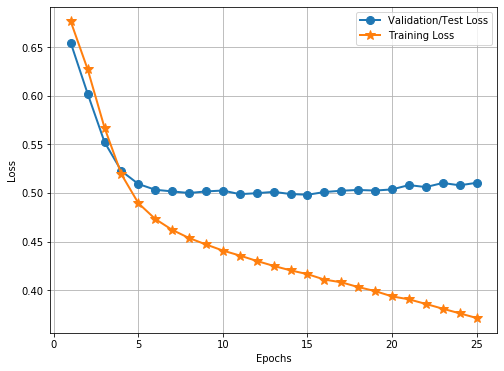

In [155]:
# Plot des loss 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

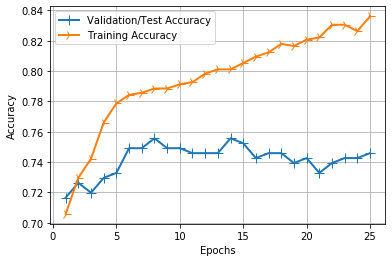

In [162]:
# Version avec TENSORFLOW 1.X et NON 2.X
# Plotting accuracy 
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [160]:
predictions = model.predict(X_test)
# seuil (proba) choisi à 0.5
predictions = (predictions > 0.5)
# matrice de confusion
print(confusion_matrix(y_test, predictions))

[[187  30]
 [ 48  42]]


In [161]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       217
           1       0.58      0.47      0.52        90

    accuracy                           0.75       307
   macro avg       0.69      0.66      0.67       307
weighted avg       0.73      0.75      0.74       307



# 2- Modélisation ANN avec couches cachées :

In [266]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

model2.add(Dense(64, activation='relu', input_dim=37, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 64)                2432      
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_55 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_56 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 33        
Total para

In [267]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training du modèle
batch_size = 32
epochs = 100

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks=[early_stop], 
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 714 samples, validate on 307 samples
Epoch 1/100
714/714 [==============================] - 1s 2ms/sample - loss: 1.8945 - acc: 0.6723 - val_loss: 1.7250 - val_acc: 0.7134
Epoch 2/100
714/714 [==============================] - 0s 78us/sample - loss: 1.7831 - acc: 0.6471 - val_loss: 1.6506 - val_acc: 0.7134
Epoch 3/100
714/714 [==============================] - 0s 79us/sample - loss: 1.6629 - acc: 0.6807 - val_loss: 1.5771 - val_acc: 0.7003
Epoch 4/100
714/714 [==============================] - 0s 77us/sample - loss: 1.5684 - acc: 0.6639 - val_loss: 1.5067 - val_acc: 0.7166
Epoch 5/100
714/714 [==============================] - 0s 79us/sample - loss: 1.4996 - acc: 0.6597 - val_loss: 1.4362 - val_acc: 0.7134
Epoch 6/100
714/714 [==============================] - 0s 76us/sample - loss: 1.4244 - acc: 0.6779 - val_loss: 1.3663 - val_acc: 0.7068
Epoch 7/100
714/714 [==============================] - 0s 82us/sample - loss: 1.3423 - acc: 0.6933 - val_loss: 1.2999 - val_acc: 0.7068
Epo

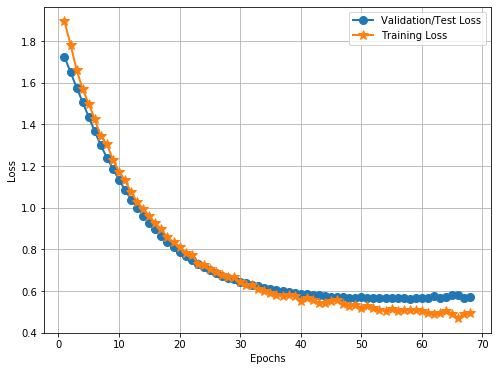

In [268]:
# Plot des loss 
plt.figure(figsize=(8,6))
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

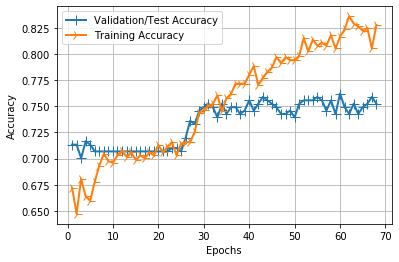

In [269]:
history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [270]:
predictions = model2.predict(X_test)
# seuil (proba) choisi à 0.5
predictions = (predictions > 0.5)
# matrice de confusion
print(confusion_matrix(y_test, predictions))

[[190  27]
 [ 49  41]]


In [271]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       217
           1       0.60      0.46      0.52        90

    accuracy                           0.75       307
   macro avg       0.70      0.67      0.68       307
weighted avg       0.74      0.75      0.74       307

